### ***Nada Elmaghraby*** <br/>
## **The sparks foundation- Data Science and business analytics intern** <br/>
### **#GRIPOCT22**
### ***Task2 Prediction using unsupervised ML***

# **Predict optimum number of clusters in iris data**

## Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets , cluster , metrics
import matplotlib.pyplot as plt

In [2]:
##Read data
iris=datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Visualization of the data

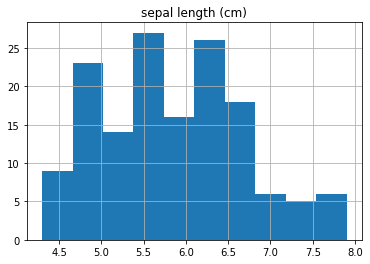

In [4]:
iris_df.hist(column='sepal length (cm)')
plt.show()

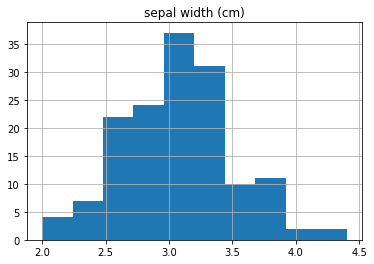

In [5]:
iris_df.hist(column='sepal width (cm)')
plt.show()

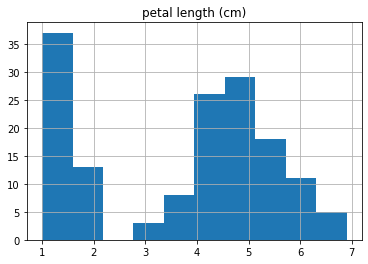

In [6]:
iris_df.hist(column='petal length (cm)')
plt.show()

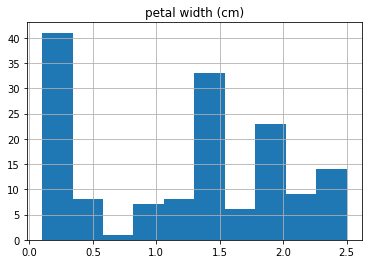

In [7]:
iris_df.hist(column='petal width (cm)')
plt.show()

## The optimum number of clusters 

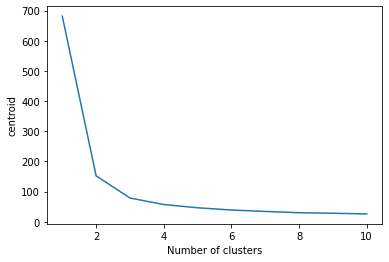

In [9]:
c_list=[]
no_clusters= range(1,11)
for i in no_clusters:
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10, random_state=0)
  kmeans.fit(iris_df.values)
  c_list.append(kmeans.inertia_)
plt.plot(no_clusters,c_list)
plt.xlabel('Number of clusters')
plt.ylabel('centroid')
plt.show()  
#noticed from the graph optimal number of clusters is 3

## Training and prediction

In [11]:
kmeans=cluster.KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(iris_df)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualizing prediction

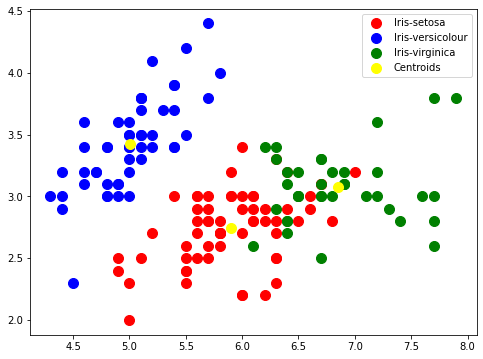

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(iris_df.values[y_kmeans==0,0],iris_df.values[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(iris_df.values[y_kmeans==1,0],iris_df.values[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(iris_df.values[y_kmeans==2,0],iris_df.values[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')
##Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.legend()